In [1]:
import gym
import copy
import numpy as np
import time as time
import torch
import torch.nn as nn
from flappyBird.io import *
import flappyBird.genetics as gen
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import math
import pygame
from pygame.locals import *

pygame 2.0.2 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
setImgBird([
    'sprites/sparrow.png',
    'sprites/sparrow_flap.png'
],40)
setImgBird(['sprites/sparrow.png', 'sprites/sparrow_flap.png'],40)

In [3]:
setImgBg([
    'sprites/background-night.png',
    'sprites/background-day.png'
],400)

In [4]:
setColorPipe(255,0,0)

# Maschine

<img src="img/bestaerkendes-lernen.png" align="left" >

## Feature extrahieren

<img src="img/ingame.jpg" align="left" >

In [6]:
def generateFeatures(state):
    bird = state['bird']
    #print(type(bird))
    posY = bird.Y
    speedY = bird.speedY
    pipes = state['pipes']
    #print(pipes[0].pos)
    return posY, speedY, pipes[0].pos,pipes[0].height,pipes[0].gap

# Neuronales Netz 

## Layer
nn.Linear(X, Y), Input dim X, Output dim Y

## Aktivierungsfunktionen
nn.ReLU()


nn.Sigmoid()


nn.Softmax(dim=1))



## Topologie
nn.Sequential(Layer, Aktivierungsfunktion, Layer, Aktivierungsfunktion...., Layer)
###### Beispiel
nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 1))

### https://pytorch.org/docs/stable/nn.html#linear-layers
### https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid


In [7]:
net = nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 5),nn.Sigmoid(), nn.Linear(5, 1))

In [8]:
# Gespeichertes Netz laden
#net = torch.load('net.pt')

In [9]:
# (trainiertes) Netz inkl. Sprites speichern
#export(net, "test")

In [10]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[ 0.1571,  0.4337, -0.2540,  0.2192,  0.1244],
        [-0.1754,  0.4243,  0.3252,  0.1254,  0.3877],
        [ 0.0621, -0.3239, -0.2996,  0.2521,  0.2182],
        [-0.2451,  0.1772,  0.3869,  0.2993,  0.0490],
        [-0.4155, -0.1965,  0.3649, -0.3171, -0.2865]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.2073, -0.4429, -0.2269,  0.0201, -0.3514], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.2983, -0.2153,  0.3150,  0.0661,  0.0869],
        [-0.1253, -0.1540,  0.3707, -0.1328,  0.3529],
        [-0.2484,  0.3666, -0.4341, -0.0198, -0.2809],
        [ 0.3715, -0.1978,  0.2113,  0.1597,  0.0948],
        [ 0.1421, -0.3525,  0.1500,  0.3413,  0.0042]], requires_grad=True)
2.bias Parameter containing:
tensor([-0.1981, -0.3104,  0.1515,  0.3640, -0.2095], requires_grad=True)
4.weight Parameter containing:
tensor([[ 0.3693,  0.2521,  0.0390,  0.0103, -0.4060]], requires_grad=True)
4.bias Parameter containing:
tens

# Aktion festlegen

  
## Bird attributes

### bird.forceX 
### bird.forceY 

### bird.speedX  (default 20)
### bird.speedY

In [11]:
def birdAction(decission, bird):
        bird.forceY = 50*decission[0]


## Reward  berechnen

<img src="img/ingame_2.jpg" align="left" >

In [12]:
def computeReward(state_old, state_new):
    return 1

# Mutationsparameter

<img src="img/ingame_3.jpg" align="left" >

In [13]:
POPULATION_SIZE = 50 #Anzahl der Vögel in der Population
PARENTS_COUNT = 10 #Anzahl der besten Vögel, aus denen dann mutiert wird
NOISE_STD = 0.1 #Mutationsstärke 

## Abstand zwischen den Pipes,  Höhe der Pipes, Grösse der Lücke

In [14]:
Interval_distance = [250, 350]
Interval_height = [100,300]
Interval_gap = [120,130]

## Max Score

In [15]:
Score_Max = 4000

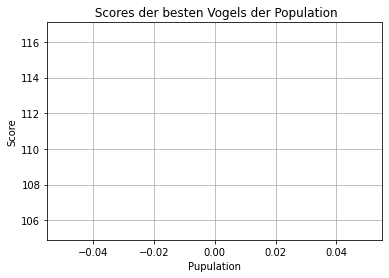

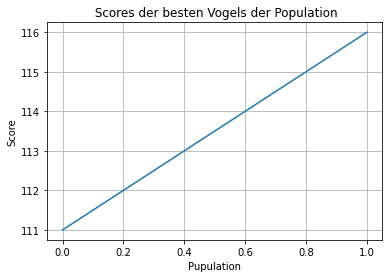

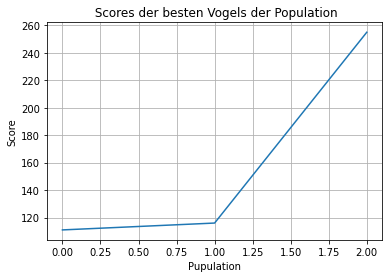

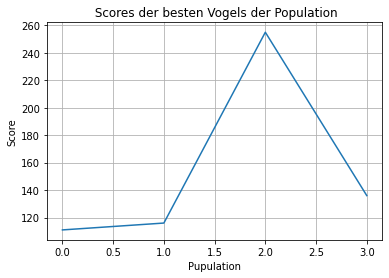

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  5
____________________________________________________________________________
Score Training:  229.0  Score Spiel:  145.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-0.0974,  0.2744, -0.0921,  0.3406,  0.6912],
        [-0.1994,  0.5189,  0.1846, -0.0110,  0.4098],
        [-0.1410, -0.3361, -0.1927,  0.2927,  0.0346],
        [-0.3141,  0.2668,  0.3561,  0.3363,  0.1143],
        [-0.4347,  0.0430,  0.1764, -0.1755, -0.3064]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.3283, -0.1901, -0.1059,  0.4052, -0.4672], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.1903, -0.3603,  0.3949,  0.0594,  0.3670],
        [-0.2685,  0.2511,  0.3125, -0.2250,  0.1071],
        [-0.8888,  0.1026, -0.3883, -0.0956,  0.0582

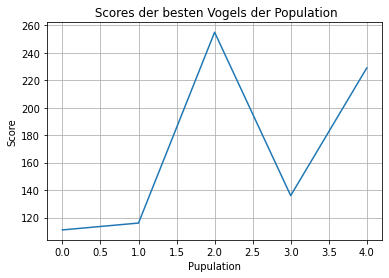

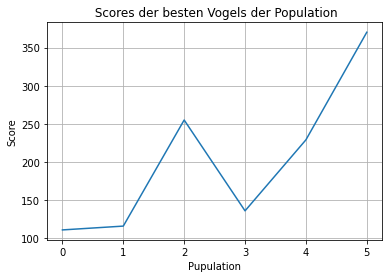

error: video system not initialized

In [16]:
fittestBirds = []

env = gym.make("scienceCampBird-v1")
env.setPipeIntervals([Interval_distance, Interval_height,Interval_gap])
population = gen.Population(POPULATION_SIZE, 5, 2, computeReward, net)
env.setAction(birdAction)
  #  print(len(population.nets))
population.evaluate_on_env(env,generateFeatures, Score_Max)
ecount = 0  
while True:
    population = gen.mutate_population(population, PARENTS_COUNT, NOISE_STD)
    population.evaluate_on_env(env, generateFeatures, Score_Max)
    fittestBirds.append(population.population[0])
    ecount +=1
    if(ecount % 5 == 0):
        print("evaluaton")
        net = population.population[0][1]
        score_e = population.population[0][0]
        score_p = env.playWithNet(net, generateFeatures, Score_Max, computeReward, ecount)
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', ecount)
        print("____________________________________________________________________________")
        print('Score Training: ', score_e, ' Score Spiel: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)
    scores = [score[0] for score in fittestBirds]
    fig, ax = plt.subplots()
    ax.plot(scores)

    ax.set(xlabel='Pupulation', ylabel='Score',
    title=' Scores der besten Vogels der Population')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

# Plott

In [ ]:
scores = [score[0] for score in fittestBirds]
fig, ax = plt.subplots()
ax.plot(scores)

ax.set(xlabel='Pupulation', ylabel='Score',
       title=' Scores der besten Vogels der Population')
ax.grid()

fig.savefig("test.png")
plt.show()

In [ ]:
i = 0
for bird in fittestBirds:
        i +=1
        net = bird[1]
        score_p = bird[0]
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', i)
        print("____________________________________________________________________________")
        print('Score: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

In [ ]:
run(
    net,
    Interval_distance,
    Interval_height,
    Interval_gap,
    computeReward,
    birdAction,
    generateFeatures,
    Score_Max
)

In [ ]:
#export(net, 'net.pt')

# Animation

Hintergrund: sprites/background-day.png

<img src="sprites/background-day.png" align="left" >

Bird: 

sprites/sparrow.png, sprites/sparrow_flap.png

<img src="sprites/sparrow.png" align="left" >
<img src="sprites/sparrow_flap.png" align="left" >